In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['font.family'] = 'AppleGothic' #malgun Gothic


# from google.colab import files     #colab 돌릴때
# uploaded = files.upload()          #colab 돌릴때

In [2]:
red = pd.read_csv("winequality-red.csv", sep=';')             # 구분자가 콤마, 가 아닌....  세미콜론;임
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
import glob      # 묶어주는 라이브러리
import os        # 폴더를 컨트롤

In [4]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [5]:
all_data = []     # 모든 데이터를 저장하기 위해 빈리스트를 만들어둠

i=0

for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type']=i
    all_data.append(data)
    i+=1         # 타입을 확인함.   레드는 0, 화이트는 1로 정의하여 와인 구분함.
    
wine = pd.concat(all_data, ignore_index=True)      # 데이터를 합침concat, concat은 axis가 기본값이   0임,  
                                                    #기존인데스를 가지고 와서 6천여개중 4900여개로 표시됨, 그래서 기존 인데스 무시처리

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


> **우리의 목표: 와인성분데이터를 넣으면 와인의 품질을 예측하는 모형

In [8]:
sorted(wine.quality.unique())             # 목표 변수

[3, 4, 5, 6, 7, 8, 9]

In [9]:
wine.quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
wine[wine.quality ==9]                   # 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### 탐색적분석  ------------------------
- 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [11]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [12]:
red_quality = wine.loc[wine.type == 0, 'quality']


In [13]:
white_quality = wine.loc[wine.type==1, 'quality']


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


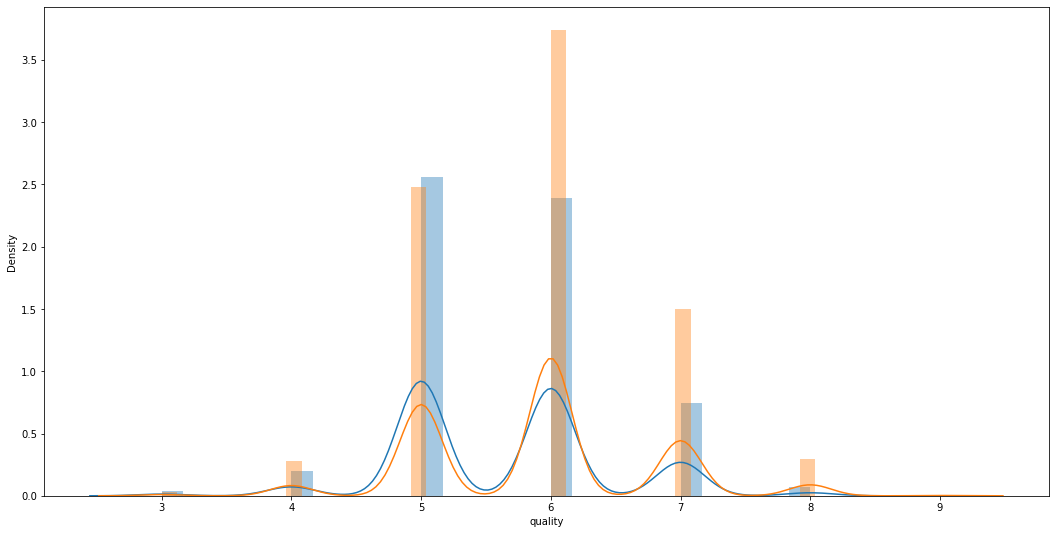

In [14]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label="White")

### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위함
- p value < 0.05     그래야 유의미한 의미임 95%  ******

In [15]:
import statsmodels.api as sm

In [16]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [17]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


### 상관관계분석

In [18]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


<AxesSubplot:>

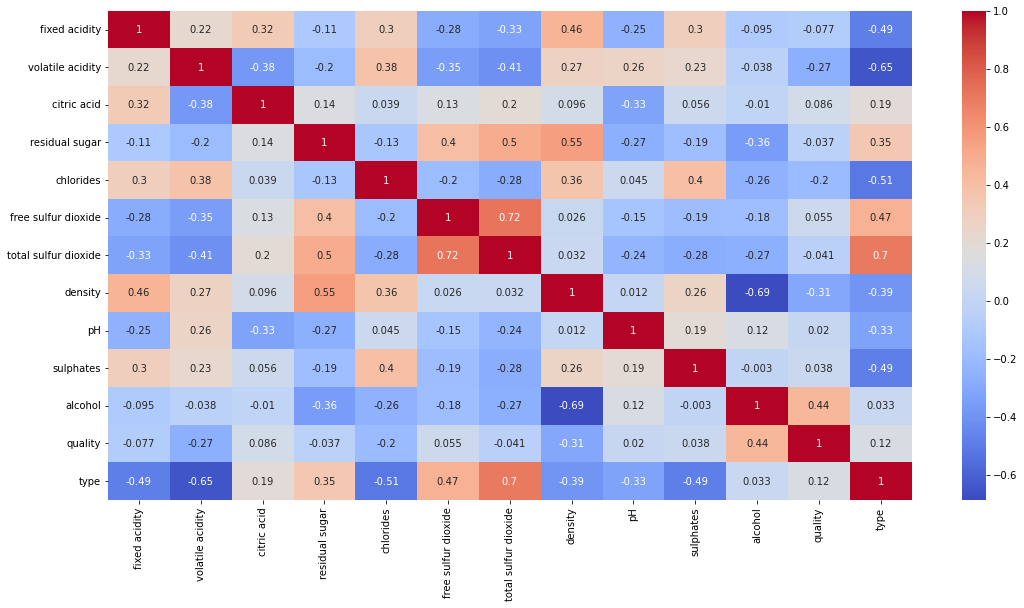

In [19]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [20]:
#너무 상관관계가 높은 아이들끼리는 같이 쓰지말고 둘중 하나를 쓰는게 좋음 공분산도가 높아짐

In [21]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

### 산점도 pairplot
- 모든 회귀문제는 산점도가 있어야 파악이 용이
- 하지만 모든 점을 산점도를 그리면   성능문제발생,   그래서 샘플링을 하여 산점도로 변수간 관계를 만듦

In [22]:
def sampling(data, n=300):         #와인 샘플링
    return data.loc[np.random.choice(data.index, size=n, replace=False)]        #choice  인덱스 골라냄,  replace 중복미허용F

In [23]:
red = wine[wine.type ==0]
white = wine[wine.type ==1]

In [24]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
135,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,5,0
136,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5,5,0
1286,7.1,0.160,0.44,2.5,0.068,17.0,31.0,0.99328,3.35,0.54,12.4,6,0
753,8.3,0.650,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,0
1111,5.4,0.420,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7,0


In [25]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3646,6.8,0.34,0.44,6.6,0.052,28.0,156.0,0.99550,3.14,0.41,9.6,5,1
4524,7.7,0.25,0.30,7.8,0.038,67.0,196.0,0.99555,3.10,0.50,10.1,5,1
2349,7.2,0.29,0.40,7.6,0.024,56.0,177.0,0.99280,3.04,0.32,11.5,6,1
1756,6.1,0.32,0.24,1.5,0.036,38.0,124.0,0.98980,3.29,0.42,12.4,7,1
2052,6.0,0.27,0.27,1.6,0.046,32.0,113.0,0.99240,3.41,0.51,10.5,7,1


In [26]:
wine_sample = pd.concat([red_sample, white_sample])

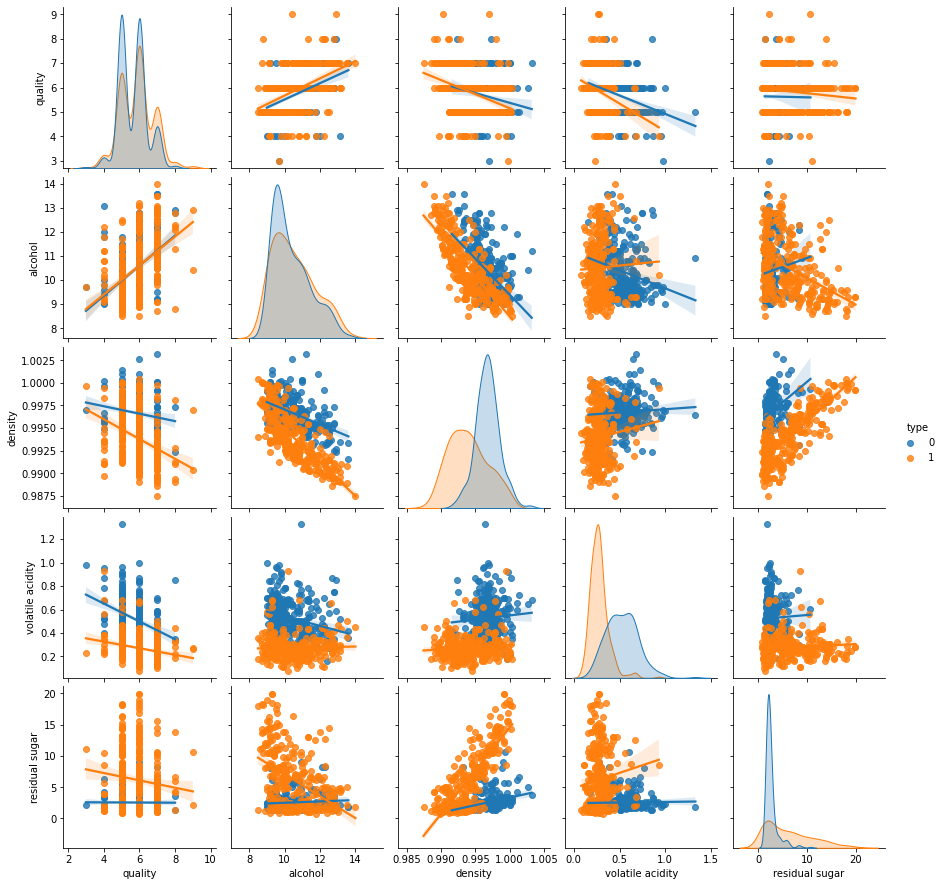

In [27]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

### .
- 선형회귀모형  만들기

In [28]:
wine.columns = wine.columns.str.replace(' ','_')

In [29]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [30]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']            #예측모델을 만들기 위해 핏쳐 셀렉션을 함

In [31]:
# features_B = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type']

In [32]:
# features_C = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density']

In [33]:
# features_D = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity']

In [34]:
# features_E = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides']

In [35]:
# features_F = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide']

In [36]:
# features_G = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH']

In [37]:
# features_H = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates']

In [121]:
# features_Z = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates', 'citric_acid']

In [123]:
y = wine.quality
X = wine[wine.columns.difference(['quality', 'type'])]
X_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [124]:
X = wine_standard[features]
# X_B = wine_standard[features_B]
# X_C = wine_standard[features_C]
# X_D = wine_standard[features_D]
# X_E = wine_standard[features_E]
# X_F = wine_standard[features_F]
# X_G = wine_standard[features_G]
# X_H = wine_standard[features_H]
# X_Z = wine_standard[features_Z]

# 훈련데이터셋과 테스트데이터셋으로 나누자
### 회귀분석의 경우는.... 훈련데이터셋과 테스트 데이터 셋을 나누어야 함

In [125]:
from sklearn.model_selection import train_test_split                   #머신러닝 라이브러리는 사이킷런에 있음

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.quality, train_size=0.8, random_state=31)

# X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, wine.quality, train_size=0.8, random_state=31)
# X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, wine.quality, train_size=0.8, random_state=31)
# X_D_train, X_D_test, y_D_train, y_D_test = train_test_split(X_D, wine.quality, train_size=0.8, random_state=31)
# X_E_train, X_E_test, y_E_train, y_E_test = train_test_split(X_E, wine.quality, train_size=0.8, random_state=31)
# X_F_train, X_F_test, y_F_train, y_F_test = train_test_split(X_F, wine.quality, train_size=0.8, random_state=31)
# X_G_train, X_G_test, y_G_train, y_G_test = train_test_split(X_G, wine.quality, train_size=0.8, random_state=31)
# X_H_train, X_H_test, y_H_train, y_H_test = train_test_split(X_H, wine.quality, train_size=0.8, random_state=31)
# X_Z_train, X_Z_test, y_Z_train, y_Z_test = train_test_split(X_Z, wine.quality, train_size=0.8, random_state=31)


In [127]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [128]:
# print(X_H_train.shape)
# print(X_H_test.shape)
# print(y_H_train.shape)
# print(y_H_test.shape)

In [45]:
# print(X_Z_train.shape)
# print(X_Z_test.shape)
# print(y_Z_train.shape)
# print(y_Z_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [46]:
# 모델정의


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
# model_H = LinearRegression()

In [50]:
# model_Z = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# model_H.fit(X_H_train, y_H_train)

In [53]:
# model_Z.fit(X_Z_train, y_Z_train)

LinearRegression()

In [54]:
# prediction = model.predict(X_test)

In [55]:
# prediction_H = model_H.predict(X_H_test)

In [56]:
# prediction_Z = model_Z.predict(X_Z_test)

In [57]:
# prediction

In [58]:
# prediction_H

In [59]:
# prediction_Z

### 모델평가

In [60]:
from sklearn import metrics

In [61]:
# metrics.mean_absolute_error(y_test, prediction)

In [62]:
# metrics.mean_absolute_error(y_H_test, prediction_H)

In [63]:
# metrics.mean_absolute_error(y_Z_test, prediction_Z)

In [64]:
# metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

In [65]:
# metrics.mean_squared_error(y_H_test, prediction_H)

In [66]:
# metrics.mean_squared_error(y_Z_test, prediction_Z)

### 하단 개인작업구간

### 숫자를 떨어뜨려라  (과제)
- 1. 그전에 핏쳐의 셀렉션과 조합, 핏처 엔지니어링... 등
- 2. 하이퍼 파라메터 수정해가며 수정
- 3. 랜덤포레스트 이용.

> **metrics.mean_squared_error(y_test, prediction)   오류율 낮추기 

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [68]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = 20, 
#                                   max_features =0.7,
#                                   random_state=31)

In [69]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 15, 
#                                    max_features =0.7,
#                                    random_state=51)

In [70]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 10, 
#                                    max_features =0.7,
#                                    random_state=51)

In [71]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 5, 
#                                    max_features =0.7,
#                                    random_state=51)

In [72]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5)                 #'neg_mean_squared_error'

In [73]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

In [74]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=15)                 #'neg_mean_squared_error'

In [75]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20)                 #'neg_mean_squared_error'

In [76]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25)                 #'neg_mean_squared_error'

In [77]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=30)                 #'neg_mean_squared_error'

In [78]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=40)                 #'neg_mean_squared_error'

In [79]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=50)                 #'neg_mean_squared_error'

In [80]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5).mean()

In [81]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10).mean()

In [82]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=15).mean()

In [83]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

In [84]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25).mean()

In [85]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=30).mean()

In [86]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=40).mean()

In [87]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=50).mean()

# 하이퍼 파라메터 시작...


In [136]:
from tqdm import tqdm

hyper_result =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in tqdm(range(80)):
    a = np.random.randint(40,80)
    b = np.random.uniform(0.2,0.9)
    model = RandomForestRegressor(n_estimators = 1000, 
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  random_state=31,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25).mean()

    hyper_result.append({'점수' : score,
                         '피쳐모델' : "basic",
                         'MAX_depth': a,
                         'MAX_features': b})
              

    print("현재 스코어는 {0:.5f}".format(score))


  1%|▏         | 1/80 [00:29<39:24, 29.93s/it]

현재 스코어는 -0.37192


  2%|▎         | 2/80 [01:00<39:19, 30.25s/it]

현재 스코어는 -0.37111


  4%|▍         | 3/80 [01:43<46:17, 36.07s/it]

현재 스코어는 -0.37378


  5%|▌         | 4/80 [02:16<44:14, 34.93s/it]

현재 스코어는 -0.37111


  6%|▋         | 5/80 [02:55<45:37, 36.50s/it]

현재 스코어는 -0.37306


  8%|▊         | 6/80 [03:27<43:07, 34.97s/it]

현재 스코어는 -0.37111


  9%|▉         | 7/80 [04:07<44:28, 36.56s/it]

현재 스코어는 -0.37306


 10%|█         | 8/80 [04:37<41:08, 34.29s/it]

현재 스코어는 -0.37192


 11%|█▏        | 9/80 [05:21<44:17, 37.42s/it]

현재 스코어는 -0.37378


 12%|█▎        | 10/80 [06:03<45:11, 38.73s/it]

현재 스코어는 -0.37306


 14%|█▍        | 11/80 [06:39<43:36, 37.91s/it]

현재 스코어는 -0.37188


 15%|█▌        | 12/80 [07:12<41:21, 36.50s/it]

현재 스코어는 -0.37111


 16%|█▋        | 13/80 [08:01<44:59, 40.29s/it]

현재 스코어는 -0.37608


 18%|█▊        | 14/80 [08:50<47:11, 42.90s/it]

현재 스코어는 -0.37608


 19%|█▉        | 15/80 [09:28<44:49, 41.38s/it]

현재 스코어는 -0.37188


 20%|██        | 16/80 [10:12<45:01, 42.20s/it]

현재 스코어는 -0.37378


 21%|██▏       | 17/80 [10:41<40:17, 38.38s/it]

현재 스코어는 -0.37192


 22%|██▎       | 18/80 [11:33<43:48, 42.39s/it]

현재 스코어는 -0.37716


 24%|██▍       | 19/80 [12:17<43:26, 42.73s/it]

현재 스코어는 -0.37378


 25%|██▌       | 20/80 [12:49<39:44, 39.74s/it]

현재 스코어는 -0.37111


 26%|██▋       | 21/80 [13:22<36:56, 37.56s/it]

현재 스코어는 -0.37111


 28%|██▊       | 22/80 [13:59<36:05, 37.34s/it]

현재 스코어는 -0.37188


 29%|██▉       | 23/80 [14:47<38:37, 40.65s/it]

현재 스코어는 -0.37608


 30%|███       | 24/80 [15:17<34:57, 37.46s/it]

현재 스코어는 -0.37192


 31%|███▏      | 25/80 [16:11<38:49, 42.35s/it]

현재 스코어는 -0.37716


 32%|███▎      | 26/80 [16:41<34:49, 38.70s/it]

현재 스코어는 -0.37192


 34%|███▍      | 27/80 [17:18<33:38, 38.08s/it]

현재 스코어는 -0.37188


 35%|███▌      | 28/80 [17:58<33:35, 38.76s/it]

현재 스코어는 -0.37306


 36%|███▋      | 29/80 [18:37<32:58, 38.80s/it]

현재 스코어는 -0.37306


 38%|███▊      | 30/80 [19:19<33:13, 39.86s/it]

현재 스코어는 -0.37378


 39%|███▉      | 31/80 [19:51<30:30, 37.36s/it]

현재 스코어는 -0.37111


 40%|████      | 32/80 [20:41<32:53, 41.12s/it]

현재 스코어는 -0.37716


 41%|████▏     | 33/80 [21:09<29:09, 37.22s/it]

현재 스코어는 -0.37192


 42%|████▎     | 34/80 [21:47<28:42, 37.45s/it]

현재 스코어는 -0.37306


 44%|████▍     | 35/80 [22:18<26:37, 35.50s/it]

현재 스코어는 -0.37111


 45%|████▌     | 36/80 [22:52<25:45, 35.12s/it]

현재 스코어는 -0.37188


 46%|████▋     | 37/80 [23:23<24:13, 33.80s/it]

현재 스코어는 -0.37111


 48%|████▊     | 38/80 [23:50<22:23, 31.98s/it]

현재 스코어는 -0.37192


 49%|████▉     | 39/80 [24:32<23:44, 34.74s/it]

현재 스코어는 -0.37378


 50%|█████     | 40/80 [25:06<23:09, 34.73s/it]

현재 스코어는 -0.37188


 51%|█████▏    | 41/80 [25:51<24:35, 37.84s/it]

현재 스코어는 -0.37608


 52%|█████▎    | 42/80 [26:22<22:35, 35.68s/it]

현재 스코어는 -0.37111


 54%|█████▍    | 43/80 [27:11<24:26, 39.64s/it]

현재 스코어는 -0.37716


 55%|█████▌    | 44/80 [27:39<21:37, 36.04s/it]

현재 스코어는 -0.37192


 56%|█████▋    | 45/80 [28:28<23:19, 40.00s/it]

현재 스코어는 -0.37716


 57%|█████▊    | 46/80 [29:13<23:31, 41.52s/it]

현재 스코어는 -0.37608


 59%|█████▉    | 47/80 [29:44<21:03, 38.29s/it]

현재 스코어는 -0.37111


 60%|██████    | 48/80 [30:11<18:45, 35.18s/it]

현재 스코어는 -0.37192


 61%|██████▏   | 49/80 [30:39<17:00, 32.93s/it]

현재 스코어는 -0.37192


 62%|██████▎   | 50/80 [31:20<17:41, 35.37s/it]

현재 스코어는 -0.37378


 64%|██████▍   | 51/80 [32:09<19:05, 39.51s/it]

현재 스코어는 -0.37716


 65%|██████▌   | 52/80 [32:40<17:13, 36.91s/it]

현재 스코어는 -0.37111


 66%|██████▋   | 53/80 [33:11<15:46, 35.06s/it]

현재 스코어는 -0.37111


 68%|██████▊   | 54/80 [33:56<16:30, 38.09s/it]

현재 스코어는 -0.37608


 69%|██████▉   | 55/80 [34:37<16:15, 39.03s/it]

현재 스코어는 -0.37378


 70%|███████   | 56/80 [35:12<15:03, 37.66s/it]

현재 스코어는 -0.37188


 71%|███████▏  | 57/80 [35:40<13:17, 34.66s/it]

현재 스코어는 -0.37192


 72%|███████▎  | 58/80 [36:14<12:40, 34.59s/it]

현재 스코어는 -0.37188


 74%|███████▍  | 59/80 [37:03<13:34, 38.80s/it]

현재 스코어는 -0.37716


 75%|███████▌  | 60/80 [37:31<11:53, 35.66s/it]

현재 스코어는 -0.37192


 76%|███████▋  | 61/80 [38:02<10:49, 34.19s/it]

현재 스코어는 -0.37111


 78%|███████▊  | 62/80 [38:47<11:16, 37.56s/it]

현재 스코어는 -0.37608


 79%|███████▉  | 63/80 [39:18<10:04, 35.56s/it]

현재 스코어는 -0.37111


 80%|████████  | 64/80 [39:55<09:36, 36.04s/it]

현재 스코어는 -0.37306


 81%|████████▏ | 65/80 [40:23<08:23, 33.58s/it]

현재 스코어는 -0.37192


 82%|████████▎ | 66/80 [41:04<08:23, 35.95s/it]

현재 스코어는 -0.37378


 84%|████████▍ | 67/80 [41:42<07:52, 36.38s/it]

현재 스코어는 -0.37306


 85%|████████▌ | 68/80 [42:30<08:00, 40.05s/it]

현재 스코어는 -0.37716


 86%|████████▋ | 69/80 [43:12<07:24, 40.37s/it]

현재 스코어는 -0.37378


 88%|████████▊ | 70/80 [43:39<06:05, 36.52s/it]

현재 스코어는 -0.37192


 89%|████████▉ | 71/80 [44:17<05:31, 36.82s/it]

현재 스코어는 -0.37306


 90%|█████████ | 72/80 [44:58<05:04, 38.09s/it]

현재 스코어는 -0.37378


 91%|█████████▏| 73/80 [45:32<04:18, 36.92s/it]

현재 스코어는 -0.37188


 92%|█████████▎| 74/80 [46:17<03:55, 39.33s/it]

현재 스코어는 -0.37608


 94%|█████████▍| 75/80 [46:54<03:13, 38.72s/it]

현재 스코어는 -0.37306


 95%|█████████▌| 76/80 [47:39<02:42, 40.53s/it]

현재 스코어는 -0.37608


 96%|█████████▋| 77/80 [48:24<02:05, 41.90s/it]

현재 스코어는 -0.37608


 98%|█████████▊| 78/80 [49:09<01:25, 42.80s/it]

현재 스코어는 -0.37608


 99%|█████████▉| 79/80 [49:46<00:41, 41.18s/it]

현재 스코어는 -0.37306


100%|██████████| 80/80 [50:31<00:00, 37.89s/it]

현재 스코어는 -0.37608


In [137]:
pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
30,-0.371107,basic,54,0.309708
20,-0.371107,basic,66,0.350389
1,-0.371107,basic,44,0.305848
3,-0.371107,basic,69,0.395784
11,-0.371107,basic,78,0.327239
...,...,...,...,...
24,-0.377156,basic,64,0.848331
58,-0.377156,basic,68,0.869964
50,-0.377156,basic,56,0.857612
44,-0.377156,basic,69,0.899843


In [138]:
print("최소에러율")
print(pd.DataFrame(hyper_result)['점수'].max())
# print(pd.DataFrame(hyper_result2)['점수'].max())
# print(pd.DataFrame(hyper_result_B)['점수'].max())
# print(pd.DataFrame(hyper_result_C)['점수'].max())
# print(pd.DataFrame(hyper_result_D)['점수'].max())
# print(pd.DataFrame(hyper_result_E)['점수'].max())
# print(pd.DataFrame(hyper_result_F)['점수'].max())
# print(pd.DataFrame(hyper_result_G)['점수'].max())
# print(pd.DataFrame(hyper_result_H)['점수'].max())
# print(pd.DataFrame(hyper_result_H2)['점수'].max())
# print(pd.DataFrame(hyper_result_Z)['점수'].max())
# print(pd.DataFrame(hyper_result_Z2)['점수'].max())

print(" ")
print("평균에러율")
print(pd.DataFrame(hyper_result)['점수'].mean())
# print(pd.DataFrame(hyper_result2)['점수'].mean())
# print(pd.DataFrame(hyper_result_B)['점수'].mean())
# print(pd.DataFrame(hyper_result_C)['점수'].mean())
# print(pd.DataFrame(hyper_result_D)['점수'].mean())
# print(pd.DataFrame(hyper_result_E)['점수'].mean())
# print(pd.DataFrame(hyper_result_F)['점수'].mean())
# print(pd.DataFrame(hyper_result_G)['점수'].mean())
# print(pd.DataFrame(hyper_result_H)['점수'].mean())
# print(pd.DataFrame(hyper_result_H2)['점수'].mean())
# print(pd.DataFrame(hyper_result_Z)['점수'].mean())
# print(pd.DataFrame(hyper_result_Z2)['점수'].mean())

최소에러율
-0.37110681172862536
 
평균에러율
-0.3733231692664011


In [139]:
# 최종 모델정의

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [141]:
Finalmodel = RandomForestRegressor()
# Finalmodel2 = RandomForestRegressor()
# Finalmodel_B = RandomForestRegressor()
# Finalmodel_C = RandomForestRegressor()
# Finalmodel_D = RandomForestRegressor()
# Finalmodel_E = RandomForestRegressor()
# Finalmodel_F = RandomForestRegressor()
# Finalmodel_G = RandomForestRegressor()
# Finalmodel_H = RandomForestRegressor()
# Finalmodel_H2 = RandomForestRegressor()
# Finalmodel_Z = RandomForestRegressor()
# Finalmodel_Z2 = RandomForestRegressor()

In [142]:
Finalmodel.fit(X_train, y_train)
# Finalmodel2.fit(X_train, y_train)
# Finalmodel_B.fit(X_B_train, y_B_train)
# Finalmodel_C.fit(X_C_train, y_C_train)
# Finalmodel_D.fit(X_D_train, y_D_train)
# Finalmodel_E.fit(X_E_train, y_E_train)
# Finalmodel_F.fit(X_F_train, y_F_train)
# Finalmodel_G.fit(X_G_train, y_G_train)
# Finalmodel_H.fit(X_H_train, y_H_train)
# Finalmodel_H2.fit(X_H_train, y_H_train)
# Finalmodel_Z.fit(X_H_train, y_H_train)
# Finalmodel_Z2.fit(X_H_train, y_H_train)

RandomForestRegressor()

In [143]:
prediction = Finalmodel.predict(X_test)
# prediction2 = Finalmodel2.predict(X_test)

In [144]:
# prediction_B = Finalmodel_B.predict(X_B_test)
# prediction_C = Finalmodel_C.predict(X_C_test)
# prediction_D = Finalmodel_D.predict(X_D_test)
# prediction_E = Finalmodel_E.predict(X_E_test)
# prediction_F = Finalmodel_F.predict(X_F_test)
# prediction_G = Finalmodel_G.predict(X_G_test)
# prediction_H = Finalmodel_H.predict(X_H_test)
# prediction_H2 = Finalmodel_H2.predict(X_H_test)
# prediction_Z = Finalmodel_H.predict(X_H_test)
# prediction_Z2 = Finalmodel_H2.predict(X_H_test)

In [145]:
prediction

array([5.93, 5.77, 6.78, ..., 5.79, 6.46, 5.36])

In [146]:
# prediction2

In [147]:
# prediction_B

In [148]:
# prediction_C

In [149]:
# prediction_D

In [150]:
# prediction_E

In [151]:
# prediction_F

In [152]:
# prediction_G

In [153]:
# prediction_H

In [154]:
# prediction_H2

In [155]:
# prediction_Z

In [156]:
# prediction_Z2

### 모델평가

In [157]:
from sklearn import metrics

In [158]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.35227876923076923

In [159]:
# metrics.mean_squared_error(y_test, prediction2)                 #  오류율이 낮아야 좋은 모델    

In [ ]:
# metrics.mean_squared_error(y_B_test, prediction_B)   

In [ ]:
# metrics.mean_squared_error(y_C_test, prediction_C) 

In [ ]:
# metrics.mean_squared_error(y_D_test, prediction_D) 

In [ ]:
# metrics.mean_squared_error(y_E_test, prediction_E) 

In [ ]:
# metrics.mean_squared_error(y_F_test, prediction_F) 

In [ ]:
# metrics.mean_squared_error(y_G_test, prediction_G) 

In [ ]:
# metrics.mean_squared_error(y_H_test, prediction_H)          

In [ ]:
# metrics.mean_squared_error(y_H_test, prediction_H2)          

In [ ]:
# metrics.mean_squared_error(y_Z_test, prediction_Z)

In [ ]:
# metrics.mean_squared_error(y_Z2_test, prediction_Z2)

### 상단 개인작업구간

In [ ]:
from statsmodels.formula.api import ols       #statsmodel:   모든 통계 공식이 들어있음.   ols:최소제곱법

In [ ]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'   #이꼴 표시이나 물결로 함

In [ ]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

#코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:

#  증명력을 추가적으로 확인해보아야 함


In [ ]:
# formula_20220530 = 'quality ~  volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외 fixed_acidity + pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외  pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity +  chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +   alcohol + type'
# # 임시제외  residual_sugar + pH + sulphates +
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + alcohol + type + residual_sugar + pH + sulphates'
# 추가  citric_acid
# #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_model = ols(formula, data=wine).fit()          #

In [ ]:
# formula_model.summary()                                #R-squared는  설명력을 갖추었 다는 것

density  -33에 대한 확인
wine.head()
0.9978    이렇게 단위차이의 격차가 너무 차이남. 그래서 단위기준을 맞추어 주어야 함. 표준화

### ** 독립변수의 표준화
- 종속변수는 절대로 표준화를 하면 안됨

In [ ]:
# formula_model = ols(formula, data=wine_standard).fit()

In [ ]:
# formula_model.summary()

In [ ]:
formula_all_model = ols(formula_all, data=wine_standard).fit()

In [ ]:
formula_all_model.summary()

In [ ]:
formula_20220530_result = ols(formula_20220530, data=wine_standard).fit()

In [ ]:
formula_20220530_result.summary()              #citric_acid

In [ ]:
# citric_acid   을  fomula에 추가한 경우  R-squared:0.296 -> 0.297    증가됨을 확인 
# 금일부터 추가하여 분석진행